#**1. Introdução**
A análise abaixo foi feita utilizando dados da IBM que foram disponibilizados no site www.kaggle.com
Nossa motivação é entender o perfil das pessoas que deixam a empresa.Isso pode ser importante para diminuir demissões, custos, aumentar a satisfação profissional e aumentar a produtividade da empresa.

Perguntas que tentaremos responder com a análise:

-Existe uma disparidade salarial entre homens e mulheres

- Quais variáveis impactam no tempo em que um funcionário permance na empresa.


Fonte do dataset



**Nota**: Forma de analisar o dataset -> Analisar o dataset(estrutura), Analise univariada e Análise bivariada.

#**2.Importando a biblioteca**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

#**3.Carregando o Dataset**

In [5]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [6]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.shape

(1470, 35)

#**3.Análise Univariada**

Text(0.5, 1.0, 'Histograma de idade')

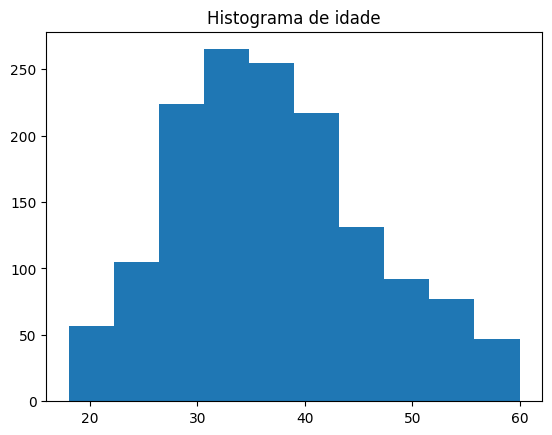

In [7]:
plt.hist(df.Age)
plt.title('Histograma de idade')


Pode-se observar que a maioria dos funcionários tem uma idade entre 30 e 40 anos.

Text(0.5, 1.0, 'Histograma de salário')

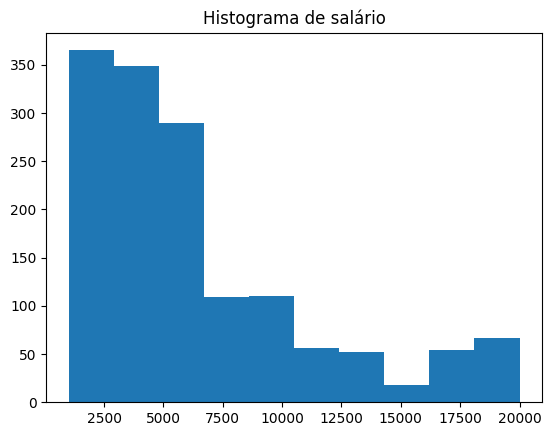

In [8]:
plt.hist(df.MonthlyIncome)
plt.title('Histograma de salário')

Aqui é possível ver que os salários estão mais distribuidos na parte esquerda do gráfico, ou seja, a mioria dos funcionários da empresa recebem um salário mais baixo, enquanto uma pequena quantidade recebe um salário mais alto.

In [ ]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [ ]:
df['Gender'].value_counts(1)

Male      0.6
Female    0.4
Name: Gender, dtype: float64

A maioria dos funcionários é do sexo masculino (60 %). As mulheres representam (40 %)

In [ ]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Text(0.5, 1.0, 'Contagem de funcionários por campo educacional')

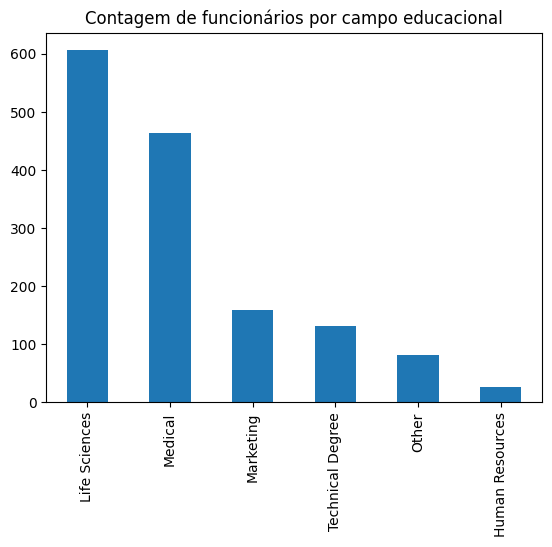

In [ ]:
df['EducationField'].value_counts().plot.bar()
plt.title('Contagem de funcionários por campo educacional')

Pode-se observar que a área de Life Sciences apresenta a maior quantidade de funcionários, seguido da área médica e depois marketing.A área com o menor número de funcionarios é a área de Human Resources.



#4. Análise bivariada

<Axes: xlabel='Gender', ylabel='MonthlyIncome'>

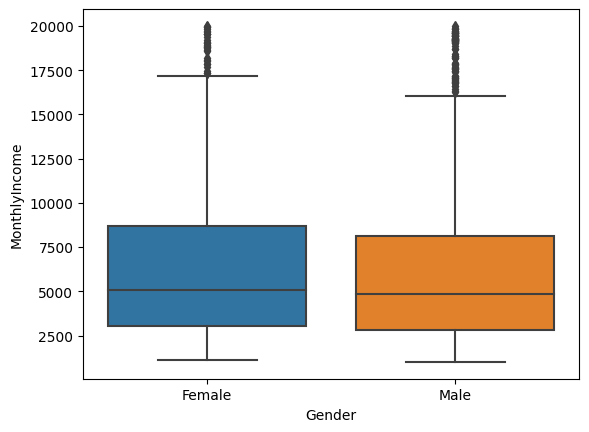

In [9]:
sns.boxplot(x='Gender', y='MonthlyIncome', data=df)

Curiosamente a distribuição salarial entre homens e mulhereres é bem parecida.

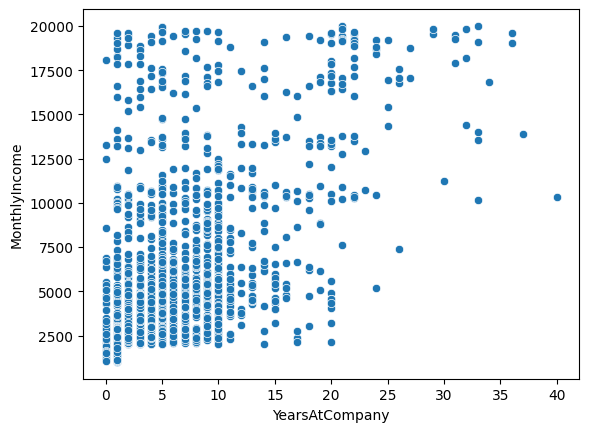

In [10]:
_= sns.scatterplot(x= 'YearsAtCompany', y= 'MonthlyIncome', data = df)

In [11]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


Acima foi feita uma análise de correlação entre as variáveis.As correlações não chamaram muito a atenção, porém as correlações que foram mais fortes, onde podemos tirar algumas conclusões são **anos com a mesma gerência X anos trabalhados**: que indica uma tendência de quanto maior o tempo em que um funcionário passa com a mesma gerência, maior a tendência dele de permanecer por mais tempo na empresa.Isso pode ocorrer porque empresas com maiores trocas de gerências tendem a apresentar muitas mudanças tornando o ambiente mais instável, podendo causar também insegurança nos funcionários.
A variável **nível de trabalho X anos trabalhados** também apresentam uma correlação mais forte, pois um trabalho que tenha um nível maior, que seja mais desafiador pode manter o funcionário mais motivado, se sentir mais valorizado e assim fazer com que ele permaneça por mais tempo.